In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('D:\\movie-recommendation-system\\Emotion_detection\\data'):
    print(dirname)


D:\movie-recommendation-system\Emotion_detection\data
D:\movie-recommendation-system\Emotion_detection\data\test
D:\movie-recommendation-system\Emotion_detection\data\test\angry
D:\movie-recommendation-system\Emotion_detection\data\test\disgust
D:\movie-recommendation-system\Emotion_detection\data\test\fear
D:\movie-recommendation-system\Emotion_detection\data\test\happy
D:\movie-recommendation-system\Emotion_detection\data\test\neutral
D:\movie-recommendation-system\Emotion_detection\data\test\sad
D:\movie-recommendation-system\Emotion_detection\data\test\surprise
D:\movie-recommendation-system\Emotion_detection\data\train
D:\movie-recommendation-system\Emotion_detection\data\train\angry
D:\movie-recommendation-system\Emotion_detection\data\train\disgust
D:\movie-recommendation-system\Emotion_detection\data\train\fear
D:\movie-recommendation-system\Emotion_detection\data\train\happy
D:\movie-recommendation-system\Emotion_detection\data\train\neutral
D:\movie-recommendation-system\Emot

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,   ## rescale or normalize the images pixels, by dividing them 255
    shear_range = 0.2,  ## angle for slant of image in degrees
    zoom_range = 0.2,   ## for zoom in or out
    horizontal_flip = True 
)
training_set = train_datagen.flow_from_directory(
    'D:\\movie-recommendation-system\\Emotion_detection\\data\\train',   ## give path of training set
    target_size=(48,48),      ## target_size of image in which you want
    batch_size=32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 27472 images belonging to 7 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'D:\\movie-recommendation-system\\Emotion_detection\\data\\test',
    target_size = (48,48),
    batch_size = 32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 7178 images belonging to 7 classes.


In [26]:
from keras.models import load_model

# Load the saved best model
model = load_model('best_model.h5')

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [18]:
model = Sequential()

In [19]:
## Add 1st convolved layer
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(filters = 256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [20]:
## Add 2nd convolved layer
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [21]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [27]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 256)       73984     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 256)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 128)       295040    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [29]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# Define a simple learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 70
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)


# Saving the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)


# Define EarlyStopping
# early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True)



In [31]:
history = model.fit(
    training_set, 
    steps_per_epoch=27472 // 64,  # Adjust if needed
    epochs=20,
    validation_data=test_set,
    validation_steps=7178 // 64,  # Adjust if needed
    callbacks=[lr_scheduler, checkpoint]
    
)


Epoch 1/20
429/429 [==============================] - ETA: 0s - loss: 0.9406 - accuracy: 0.6434
Epoch 1: val_loss improved from inf to 1.00149, saving model to best_model.h5
429/429 [==============================] - 296s 689ms/step - loss: 0.9406 - accuracy: 0.6434 - val_loss: 1.0015 - val_accuracy: 0.6306 - lr: 0.0010
Epoch 2/20


d:\movie-recommendation-system\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


429/429 [==============================] - ETA: 0s - loss: 0.9335 - accuracy: 0.6513
Epoch 2: val_loss did not improve from 1.00149
429/429 [==============================] - 256s 596ms/step - loss: 0.9335 - accuracy: 0.6513 - val_loss: 1.0415 - val_accuracy: 0.6180 - lr: 0.0010
Epoch 3/20
429/429 [==============================] - ETA: 0s - loss: 0.9429 - accuracy: 0.6469
Epoch 3: val_loss did not improve from 1.00149
429/429 [==============================] - 235s 547ms/step - loss: 0.9429 - accuracy: 0.6469 - val_loss: 1.0353 - val_accuracy: 0.6208 - lr: 0.0010
Epoch 4/20
429/429 [==============================] - ETA: 0s - loss: 0.9302 - accuracy: 0.6533
Epoch 4: val_loss improved from 1.00149 to 0.99514, saving model to best_model.h5
429/429 [==============================] - 221s 514ms/step - loss: 0.9302 - accuracy: 0.6533 - val_loss: 0.9951 - val_accuracy: 0.6295 - lr: 0.0010
Epoch 5/20
429/429 [==============================] - ETA: 0s - loss: 0.9279 - accuracy: 0.6555
Epoch 5

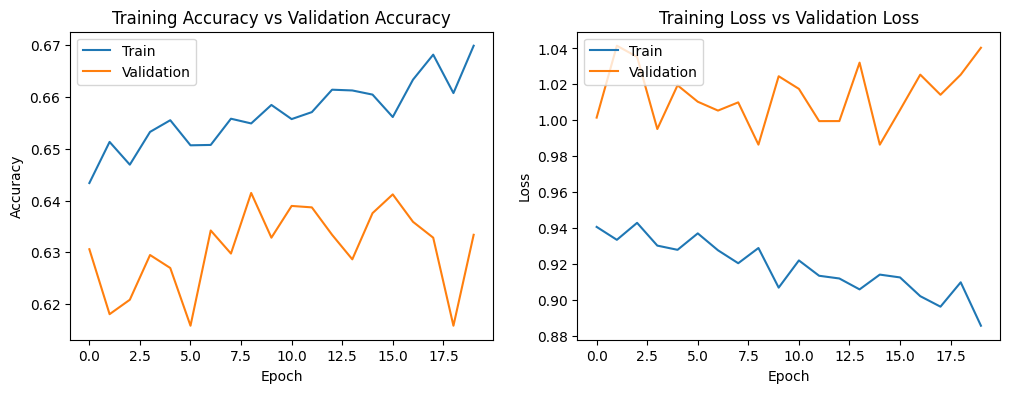

In [32]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

225/225 [==============================] - 37s 161ms/step


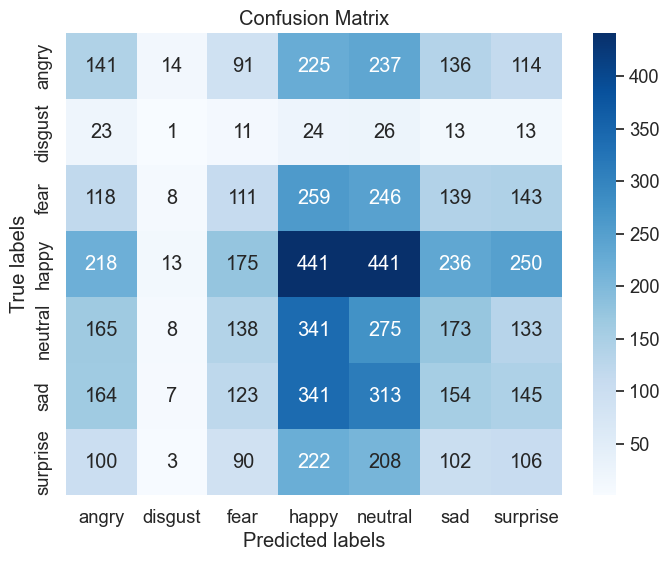

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


predictions = model.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_set.classes
labels = ['angry', 'disgust', 'fear','happy', 'neutral', 'sad', 'surprise']

conf_matrix = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
train_loss, train_acc = model.evaluate(training_set)
test_loss, test_acc   = model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 20s 89ms/step - loss: 1.0368 - accuracy: 0.6261
final train accuracy = 72.18 , validation accuracy = 62.61
